# The Tricorn Fractal

This is an attempt to adapt code used earlier to generate the Tricorn fractal. This is created in a similar manner to the Mandelbrot fractal but instead of the function $z\mapsto z^2 + c$ we the non-analytic variante $z\mapsto\overline{z}^2 + c$. For details see: https://en.wikipedia.org/wiki/Tricorn_(mathematics)

In [1]:
# The usual imports

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from dataclasses import dataclass
from math import log

In [11]:
# First basic function

def z(n, c):
    if n == 0:
        return 0
    else:
        return (z(n-1, c).conjugate()) ** 2 + c

In [15]:
# Another useful function

def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [20]:
# A function for guaging whether a point is diverging or not

def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = (z.conjugate()) ** 2 + c
    return abs(z) <= 2

In [18]:
def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)
    return c[mask]

## Basic plot

C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_31372\1354485734.py:6: RuntimeWarning: overflow encountered in square
  z = (z.conjugate()) ** 2 + c
C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_31372\1354485734.py:6: RuntimeWarning: invalid value encountered in square
  z = (z.conjugate()) ** 2 + c
C:\Users\Ben Fairbairn\AppData\Local\Temp\ipykernel_31372\1354485734.py:7: RuntimeWarning: overflow encountered in absolute
  return abs(z) <= 2


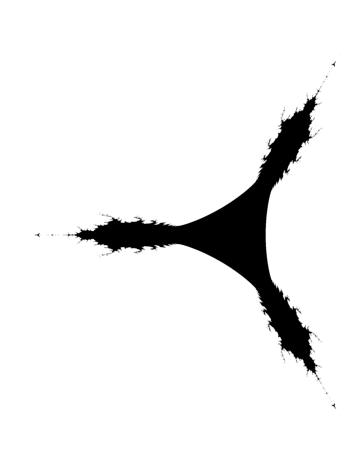

In [23]:
#A slightly more sophisticated approach to the same thing

c = complex_matrix(-2, 1, -2, 2, pixel_density=512)
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()